In [498]:
import yfinance as yf           # import yfinance library for financial data
import matplotlib as mpl        # import matplotlib for data visualisation and manupilation 
import pandas as pd             # import pandas for data visualisation and manipulation 
import numpy as np              # import numpy for numerical calculation 
import matplotlib.pyplot as plt # import matplotlib.pyplot 
import os                       # import os for operating system-related functionalities 


In [499]:
# Ticker symbol for Rolls-Royce
ticker_rrl = 'RR.L'
# import historical daily data via Yahoo Finance 
df = yf.download(ticker_rrl, start = "2020-09-01", end = "2022-09-01")

[*********************100%%**********************]  1 of 1 completed


In [500]:
# calculate the normal adjusted returns 
normal_return = []
for i in range(0,len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    x = (adjclose_today - adjclose_yesterday) / adjclose_yesterday
    normal_return.append(x)
# display the first 10 normal returns
print(normal_return[:10])

[0.05273302884363037, 0.0032179561462543495, -0.0036655183914981807, 0.03678237218267493, -0.029268175816687253, -0.03746035344279231, -0.011390463834037513, 0.008161463062887677, 0.0014278389746576845, -0.033286113140287316]


In [501]:
# Calculate the log returns
log_return = []
for i in range(0, len(df)-1):
    adjclose_yesterday = df.iloc[i]['Adj Close']
    adjclose_today = df.iloc[i+1]['Adj Close']
    y = np.log(adjclose_today / adjclose_yesterday)
    log_return.append(y)
# display the first 10 normal returns
print(log_return[:10])

[0.05138966714499594, 0.0032127896062071697, -0.003672252865967528, 0.036122044332711545, -0.02970503402407827, -0.038180022440265374, -0.011455832023936015, 0.008128338431480218, 0.001426820581874163, -0.0338527043931644]


In [502]:
# display the last rows of the DataFrame
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-24,80.000000,80.309998,78.730003,80.309998,80.309998,23059116
2022-08-25,80.220001,81.769997,79.860001,80.529999,80.529999,13438657
2022-08-26,81.199997,81.279999,78.480003,78.480003,78.480003,22534383
2022-08-30,78.550003,80.099998,77.370003,78.199997,78.199997,25551161
2022-08-31,78.550003,78.550003,76.300003,77.000000,77.000000,63097922


In [503]:
# convert the list variable to numpy array:
normal_return=np.array(normal_return)
# calculate the mean and standard deviation using numpy:
mean_nr = normal_return.mean() * len(normal_return)
sd_nr = normal_return.std() * (len(normal_return) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (mean_nr,sd_nr))

The annulized normal return is 0.55467493 and its annulized volatility is 1.00060659


In [504]:
# convert the list variable to numpy array:
log_return=np.array(log_return)
# calculate the mean and standard deviation using numpy:
mean_logr = log_return.mean() * len(log_return)
sd_logr = log_return.std() * (len(log_return) ** 0.5)
print('The annulized normal return is %.8f and its annulized volatility is %.8f' % (mean_logr,sd_logr))

The annulized normal return is 0.08207247 and its annulized volatility is 0.96035248


Text(0.5, 1.0, 'Closing Price')

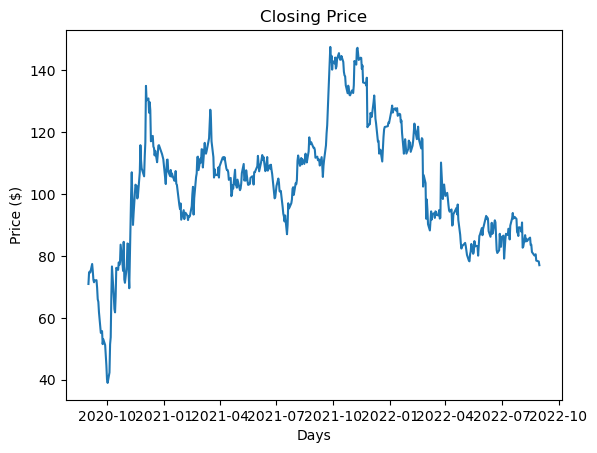

In [505]:
# plot closing price for the period between 2020-09-01 and 2022-09-01
fig = plt.figure()
plt.plot(df['Close']) 
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closing Price')

Text(0.5, 1.0, 'Log Return')

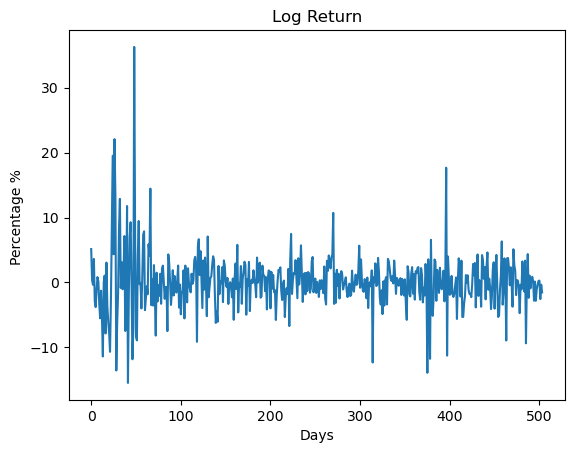

In [506]:
# plot the log for the period between 2020-09-01 and 2022-09-01
fig = plt.figure()
plt.plot(log_return * 100)
plt.xlabel('Days')
plt.ylabel('Percentage % ')
plt.title('Log Return')

In [507]:
# financial derivative analysis - Binomial Tree Call Option Pricing 
S0 = 77                 # initial spot stock price
K = 57                  # strike price of the option 
T = 0.25                # maturity 
r = 0.04                # risk free interest rate 
sigma = 0.96            # diffusion coefficient or volatility
N = 5                   # number of periods or number of time steps  
payoff = "call"         # payoff 

In [508]:
dT = float(T) / N                             # Delta t - time step size 
u = np.exp(sigma * np.sqrt(dT))               # up factor for the Binomial Tree 
d = 1.0 / u                                   # down factor for the Binomial Tree

In [509]:
S = np.zeros((N + 1, N + 1))          # start the stock price matrix
S[0, 0] = S0                          # set the initial stock price at time t=0
z = 1                                 # variable to control the loop limit 
for t in range(1, N + 1): #looping forwards, from 1 to N
    for i in range(z):  #looping forwards, from 0 to z-1
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1  # same as z=z+1

In [510]:
S

array([[ 77.        ,  95.43715306, 118.28896343, 146.61249231,
        181.71790738, 225.22908754],
       [  0.        ,  62.12465282,  77.        ,  95.43715306,
        118.28896343, 146.61249231],
       [  0.        ,   0.        ,  50.12301933,  62.12465282,
         77.        ,  95.43715306],
       [  0.        ,   0.        ,   0.        ,  40.43993733,
         50.12301933,  62.12465282],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         32.62749437,  40.43993733],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  26.32430857]])

In [511]:
# risk-neutral probabilities in Binomial Tree
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4511670146194694

In [512]:
S_T = S[:,-1]                          # stock prices at maturity 
V = np.zeros((N + 1, N + 1))           # start the option value matrix at maturity 
if payoff =="call":                    
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[  0.        ,   0.        ,   0.        ,   0.        ,
          0.        , 168.22908754],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  89.61249231],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  38.43715306],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   5.12465282],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ]])

In [513]:
# for European Option
for j in range(N-1, -1, -1): # Column. looping backwards. From N-1 to 0
    for i in range(j+1):  # Row. looping forwards. From 0 to j
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1]) #the theoretical value at each node.
V

array([[ 25.43524136,  40.3818904 ,  61.62993948,  89.84003691,
        124.83179346, 168.22908754],
       [  0.        ,  13.2411608 ,  23.06227857,  38.66469767,
         61.4028495 ,  89.61249231],
       [  0.        ,   0.        ,   5.21603169,  10.32046764,
         20.11388608,  38.43715306],
       [  0.        ,   0.        ,   0.        ,   1.03896747,
          2.30745479,   5.12465282],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,   0.        ]])

In [514]:
print('European ' + payoff, str( V[0,0]))

European call 25.435241361624275


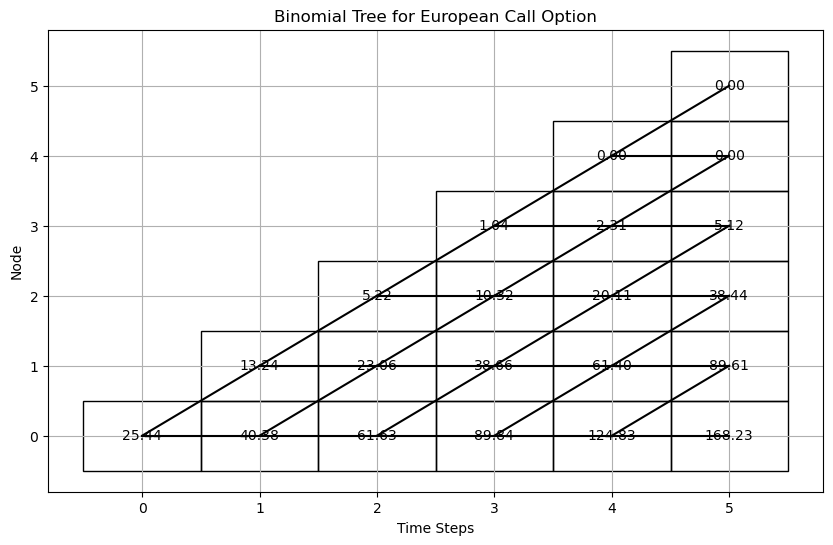

In [515]:
from matplotlib.patches import Rectangle
# Plot the binomial tree with option values 
plt.figure(figsize=(10, 6))

for j in range(N):
    for i in range(j + 1):
        plt.plot([j, j + 1], [i, i], 'k-')  # Horizontal lines
        plt.plot([j, j + 1], [i, i + 1], 'k-')  # Diagonal lines

# Add rectangles for option values
for j in range(N + 1):
    for i in range(j + 1):
        rect = Rectangle((j - 0.5, i - 0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
        plt.gca().add_patch(rect)
        plt.text(j, i, f'{V[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Binomial Tree for European ' + payoff.capitalize() + ' Option')
plt.xlabel('Time Steps')
plt.ylabel('Node')
plt.grid(True)
plt.show()

In [516]:
# financial derivative analysis - Binomial Tree Put Option Pricing
S0 = 77             # initial spot stock price
K = 97              # strike price of the option 
T = 0.25            # maturity 
r = 0.04            # risk free interest rate 
sigma = 0.96        # diffusion coefficient or volatility
N = 5               # number of periods or number of time steps  
payoff = "put"      # payoff

In [517]:
dT = float(T) / N                             # Delta t - time step size
u = np.exp(sigma * np.sqrt(dT))               # up factor for the Binomial Tree
d = 1.0 / u                                   # down factor for the Binomial Tree

In [518]:
S = np.zeros((N + 1, N + 1))   # start the stock price matrix with zeros
S[0, 0] = S0                   # set the initial stock price at time t = 0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [519]:
S

array([[ 77.        ,  95.43715306, 118.28896343, 146.61249231,
        181.71790738, 225.22908754],
       [  0.        ,  62.12465282,  77.        ,  95.43715306,
        118.28896343, 146.61249231],
       [  0.        ,   0.        ,  50.12301933,  62.12465282,
         77.        ,  95.43715306],
       [  0.        ,   0.        ,   0.        ,  40.43993733,
         50.12301933,  62.12465282],
       [  0.        ,   0.        ,   0.        ,   0.        ,
         32.62749437,  40.43993733],
       [  0.        ,   0.        ,   0.        ,   0.        ,
          0.        ,  26.32430857]])

In [520]:
a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.4511670146194694

In [521]:
# stock price at maturity time 
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         1.56284694],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        34.87534718],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        56.56006267],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        70.67569143]])

In [522]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[26.99281243, 15.98323906,  6.36439793,  0.46887781,  0.        ,
         0.        ],
       [ 0.        , 36.14167216, 23.94869014, 11.23401368,  0.85602818,
         0.        ],
       [ 0.        ,  0.        , 46.29672319, 34.48812214, 19.80619387,
         1.56284694],
       [ 0.        ,  0.        ,  0.        , 56.17283764, 46.68317454,
        34.87534718],
       [ 0.        ,  0.        ,  0.        ,  0.        , 64.1786995 ,
        56.56006267],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        70.67569143]])

In [523]:
print('European ' + payoff, str( V[0,0]))

European put 26.99281243029036


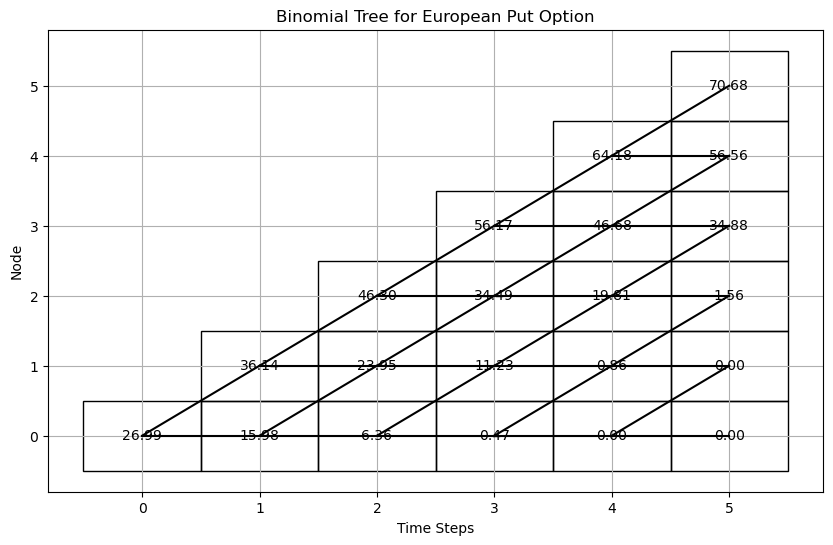

In [524]:
from matplotlib.patches import Rectangle
# Plot the binomial tree with option values 
plt.figure(figsize=(10, 6))

for j in range(N):
    for i in range(j + 1):
        plt.plot([j, j + 1], [i, i], 'k-')  # Horizontal lines
        plt.plot([j, j + 1], [i, i + 1], 'k-')  # Diagonal lines

# Add rectangles for option values
for j in range(N + 1):
    for i in range(j + 1):
        rect = Rectangle((j - 0.5, i - 0.5), 1, 1, linewidth=1, edgecolor='black', facecolor='none')
        plt.gca().add_patch(rect)
        plt.text(j, i, f'{V[i, j]:.2f}', ha='center', va='center', color='black')

plt.title('Binomial Tree for European ' + payoff.capitalize() + ' Option')
plt.xlabel('Time Steps')
plt.ylabel('Node')
plt.grid(True)
plt.show()

In [525]:
# Monte Carlo Simulation for option pricing function 
def mcs_simulation_np(p):
    M = p
    I = p
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) # loop trough time steps for simulations 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t])    
    return S

In [526]:
# assign values 
T = 0.25
r = 0.4
sigma = 0.96
S0 = 77
K = 97

In [527]:
S = mcs_simulation_np(1000)

In [528]:
S = np.transpose(S)
S

array([[ 77.        ,  76.3842371 ,  78.07430871, ..., 113.35420663,
        112.86189256, 112.30760277],
       [ 77.        ,  77.52361255,  76.51158489, ...,  45.61221505,
         44.93043715,  44.26598871],
       [ 77.        ,  77.61886668,  77.90382576, ...,  53.82530181,
         54.23954121,  54.52194902],
       ...,
       [ 77.        ,  76.45119976,  75.00024321, ...,  49.32502791,
         50.44156091,  48.83155788],
       [ 77.        ,  78.50698373,  77.52257066, ...,  92.71570992,
         91.30673629,  89.76805682],
       [ 77.        ,  79.32657929,  78.33648686, ...,  75.21453647,
         75.1681823 ,  75.4576277 ]])

Text(0.5, 1.0, 'Frequency distribution of the simulated end-of-preiod values')

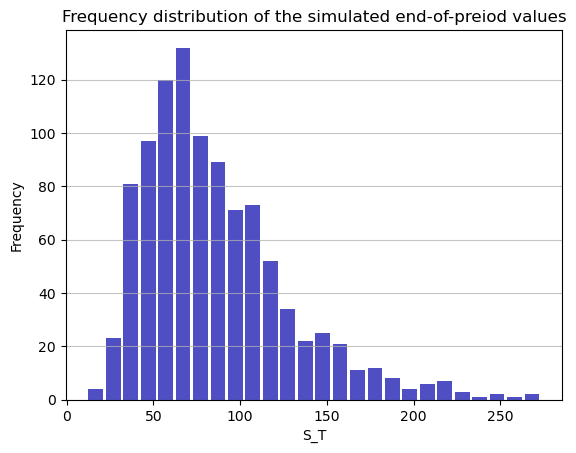

In [529]:
# create histogram of the simulated values 
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('S_T')
plt.ylabel('Frequency')
plt.title('Frequency distribution of the simulated end-of-preiod values')

In [530]:
p = np.exp(-r*T)*np.mean(np.maximum(K - S[:,-1],0))
print('European put', str(p))

European put 21.012157506912626


In [531]:
c = np.exp(-r*T)*np.mean(np.maximum(S[:,-1] - K,0))
print('European call', str(c))

European call 10.935850111214314


In [532]:
# Greeks - importing necessary module for 3D plotting 
from mpl_toolkits.mplot3d import Axes3D

In [533]:
import scipy.stats as si    # importing module for Black-Scholes calculations
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [534]:
euro_option_bs(77, 57, 0.25, 0.04, 0.96, 'call')

25.426879478818584

In [535]:
euro_option_bs(77, 97, 0.25, 0.04, 0.96, 'put')

27.59393453306358

In [536]:
S = np.linspace(50, 150, 11)       # define the range of stock prices 
Call = np.zeros(len(S))
Put = np.zeros(len(S))

for i in range(len(S)):            # loop through each stock price in the range 
    Call[i] = euro_option_bs(S[i], 57, 0.25, 0.04, 0.96, 'call')
    Put[i] = euro_option_bs(S[i], 97, 0.25, 0.04, 0.96, 'put')

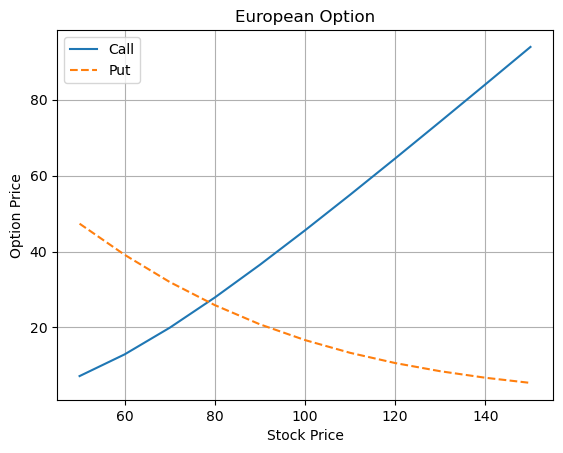

In [537]:

# create plot
fig = plt.figure()
plt.plot(S, Call, '-')
plt.plot(S, Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Option Price')
plt.title('European Option')
plt.legend(['Call', 'Put'])
plt.show()

In [538]:
# Delta calculation function 
def delta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  si.norm.cdf(d1, 0.0, 1.0)-1
    
    return delta

In [539]:
delta(77, 57, 0.25, 0.04, 0.96, 'call')

0.8125694158366437

In [540]:
delta(77, 97, 0.25, 0.04, 0.96, 'put')

-0.5871500542347463

In [541]:
# define a range of stock prices 
S = np.linspace(50,150,11)
# start arrays to store delta values 
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
# loop through each stock price in the range 
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 57, 0.25, 0.04, 0.96, 'call')
    Delta_Put [i] = delta(S[i], 97, 0.25, 0.04, 0.96, 'put')

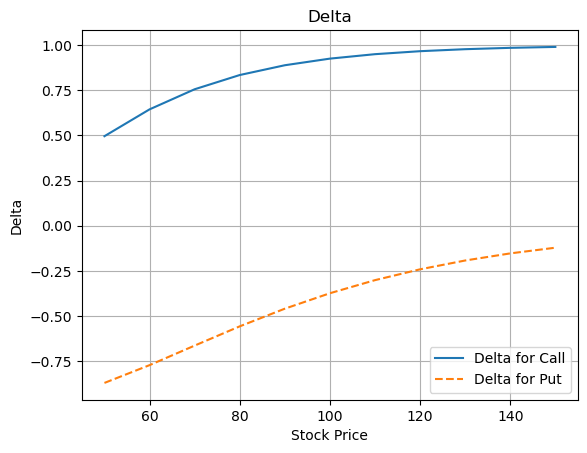

In [542]:
# create plot
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

In [543]:
# update delta calculation function 
def delta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta = si.norm.cdf(d1, 0.0, 1.0) - 1
    
    return delta

In [544]:
# define a range of stock prices and time to expiry 
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Delta = np.zeros((len(T),len(S)))
# loop through each combination of stock price and time to expiry
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 57, T[i], 0.04, 0.96, 'call')

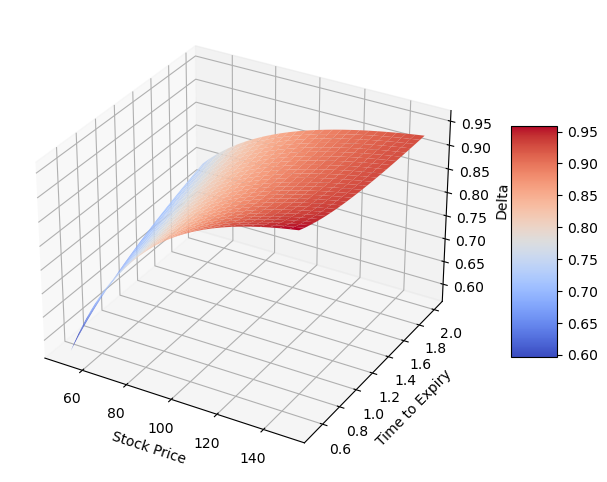

In [545]:
# create a 3d figure for the plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection = '3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
#rstride: the array of row stride (step size) cstride: the array of column stride.
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [546]:
# Gamma calculation function 
def gamma(S, K, T, r,  vol, payoff):
    d1 = (np.log(S / K) + (r  + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = si.norm.pdf(d1, 0.0, 1.0) / (vol *  np.sqrt(T) * S)
    return gamma

In [547]:
gamma(77, 57, 0.25, 0.04, 0.96, 'call')

0.0072807737197816205

In [548]:
gamma(77, 97, 0.25, 0.04, 0.96, 'put')

0.0105353060191889

In [549]:
# define a range of stock prices 
S = np.linspace(50,150,11)
Gamma = np.zeros((len(S),1))
# loop through each stock price in the range
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 57, 0.25, 0.04, 0.96, 'call')

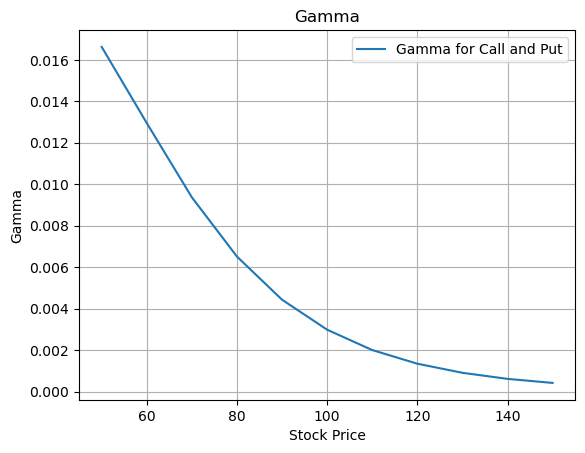

In [550]:
# create a figure for the plot 
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put'])

In [551]:
# update Gamma calculation function 
def gamma(S, K, T, r,  vol, payoff):
    d1 = (np.log(S / K) + (r  + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = si.norm.pdf(d1, 0.0, 1.0) / (vol *  np.sqrt(T) * S)
    return gamma

In [588]:
# define a range of stock prices and time to expiry
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Gamma = np.zeros((len(T),len(S)))
#  loop through each combination of stock price and time to expiry
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 105, T[i], 0.04, 0.3, 'call')

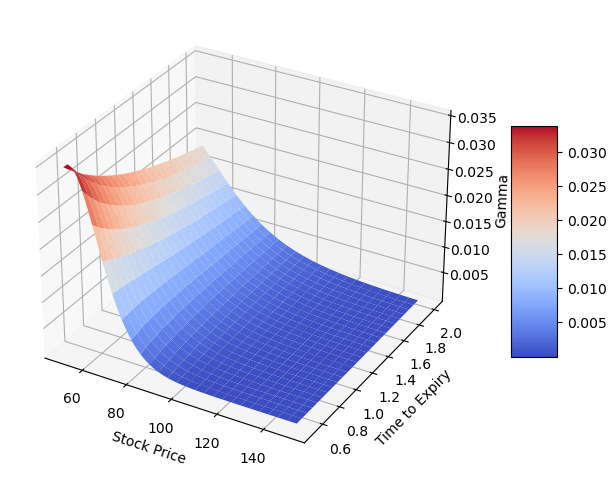

In [553]:
# create a 3D figure for the plot 
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection = '3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [575]:
# Theta calculation function 
def theta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    
    if payoff == "call":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta;

In [555]:
theta(77, 57, 0.25, 0.04, 0.96, 'call')

-21.377318184440995

In [556]:
theta(77, 97, 0.25, 0.04, 0.96, 'put')

-25.87115303351931

In [569]:
# define a range of time to expiry (T)
T = np.linspace(0.25,3,12)
Theta_Call = np.zeros((len(T),1))
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Call [i] = theta(77, 57, T[i], 0.04, 0.96, 'call')
    Theta_Put [i] = theta(77, 97, T[i], 0.04, 0.96, 'put')

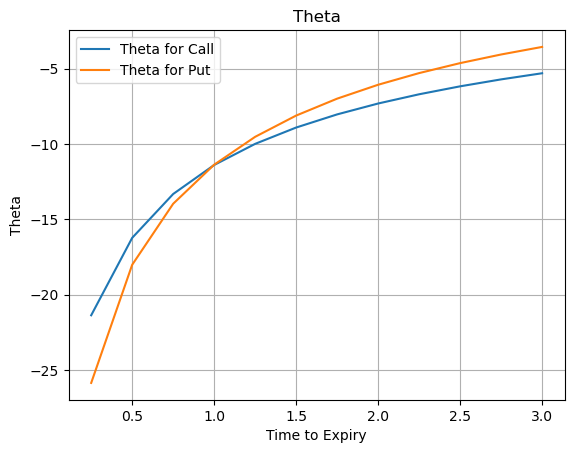

In [570]:
# create a figure for the plot 
fig = plt.figure()
plt.plot(T, Theta_Call, '-')
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend(['Theta for Call', 'Theta for Put'])

In [594]:
# update Theta calculation function 
def theta(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    
    if payoff == "call":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) - r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = - S * N_d1_prime * vol / (2 * np.sqrt(T)) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [596]:
# define a range of stock prices and time to expiry
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Theta = np.zeros((len(T), len(S)))
# loop through each combination of stock price and time to expiry
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i, j] = theta(S[j], 57, T[i], 0.04, 0.96, 'call')


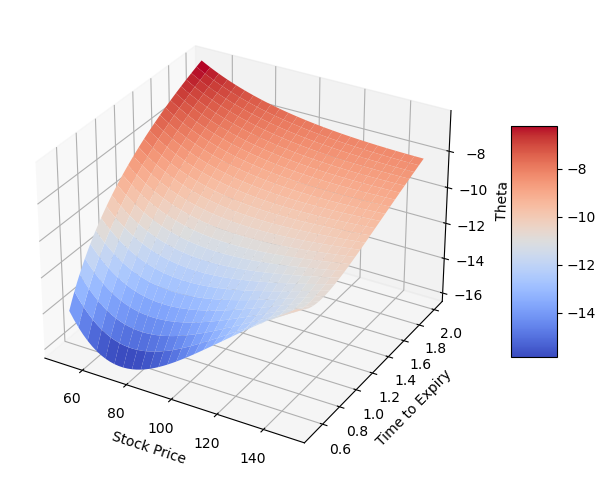

In [597]:
# create a 3D figure for the plot 
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection = '3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [559]:
# Rho calculation function 
def rho(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [560]:
rho(77, 57, 0.25, 0.04, 0.96, 'call')

9.285241385150744

In [561]:
rho(77, 97, 0.25, 0.04, 0.96, 'put')

-18.201122177284763

In [606]:
# define a range of interest rate
r = np.linspace(0,0.1,11)
Rho_Call = np.zeros((len(r),1))
Rho_Put = np.zeros((len(r),1))
# loop through each interest rate in the range
for i in range(len(r)):
    Rho_Call [i] = rho(77, 57, 0.25, r[i], 0.96, 'call')
    Rho_Put [i] = rho(77, 97, 0.25, r[i], 0.96, 'put')

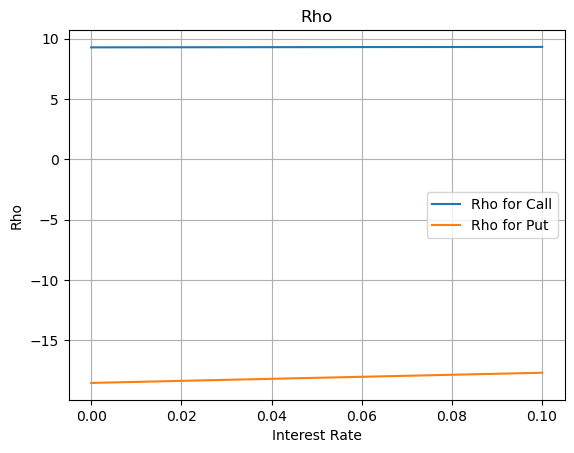

In [607]:
# create a figure for the plot 
fig = plt.figure()
plt.plot(r, Rho_Call, '-')
plt.plot(r, Rho_Put, '-')
plt.grid()
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.title('Rho')
plt.legend(['Rho for Call', 'Rho for Put'])

In [619]:
# update Rho calculation function 
def rho(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [620]:
# define a range of stock prices and time to expiry
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Rho = np.zeros((len(T),len(S)))
# loop through each combination of stock price and time to expiry
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 57, T[i], 0.04, 0.96, 'call')

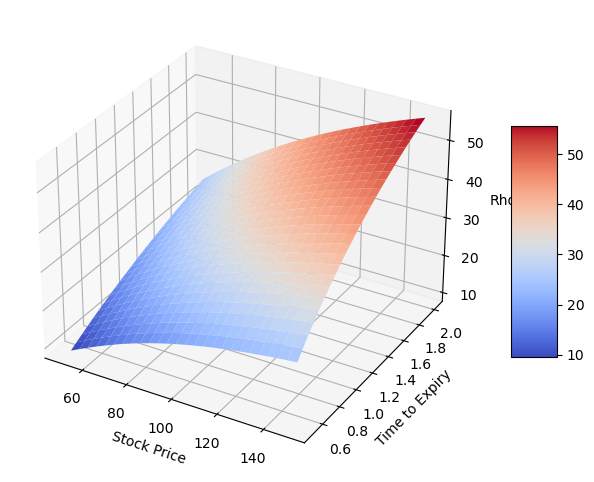

In [621]:
# create a 3D figure for the plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection = '3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

In [564]:
# Vega calculation function 
def vega(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    vega = S * np.sqrt(T) * N_d1_prime
    
    return vega

In [565]:
vega(77, 57, 0.25, 0.04, 0.96, 'call')

10.360249772300456

In [566]:
vega(77, 77, 0.25, 0.04, 0.96, 'put')

14.8455876655708

In [612]:
# define a range of volatility values
vol = np.linspace(0.1,0.4,13)
Vega = np.zeros((len(vol),1))
# loop through each volatility value in the range
for i in range(len(vol)):
    Vega [i] = vega(77, 57, 0.25, 0.04, vol[i], 'call')

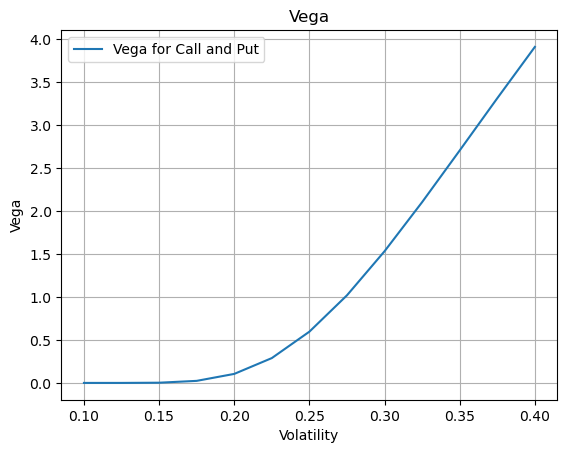

In [613]:
# plot figure 
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])

In [603]:
# update Vega Calculation Function
def vega(S, K, T, r, vol, payoff):
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    N_d1_prime=1/np.sqrt(2 * np.pi) * np.exp(-d1**2/2)
    vega = S * np.sqrt(T) * N_d1_prime
    
    return vega

In [604]:
# define a range of stock prices and time to expiry
S = np.linspace(50, 150, 51)
T = np.linspace(0.5, 2, 51)
Vega = np.zeros((len(T),len(S)))
# loop through each combination of stock price and time to expiry
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 57, T[i], 0.04, 0.96, 'call')

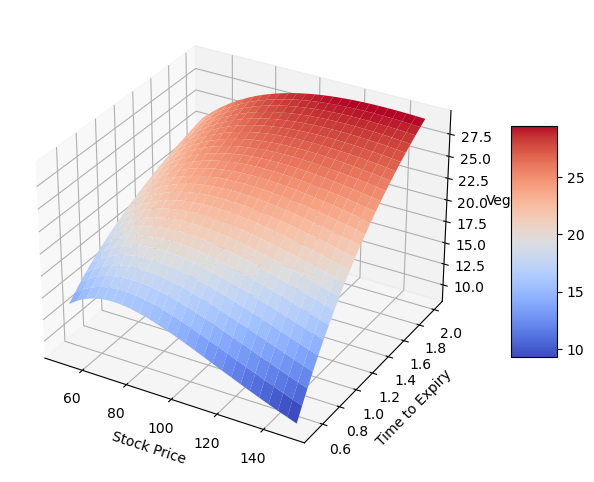

In [605]:
# create a 3D figure for the plot
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection = '3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);